In [37]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [38]:
population=pd.read_csv(r"C:\Users\hindm\OneDrive\Bureau\ocr\projet4\Nouveau dossier\population.csv")
sous_nutrition=pd.read_csv(r"C:\Users\hindm\OneDrive\Bureau\ocr\projet4\Nouveau dossier\sous_nutrition.csv")
sous_nutrition['Valeur']=pd.to_numeric(sous_nutrition['Valeur'],errors='coerce')
dispo_alimentaire=pd.read_csv(r"C:\Users\hindm\OneDrive\Bureau\ocr\projet4\Nouveau dossier\dispo_alimentaire.csv")
aide_alimentaire=pd.read_csv(r"C:\Users\hindm\OneDrive\Bureau\ocr\projet4\Nouveau dossier\aide_alimentaire.csv")
population_2017=population.loc[population["Année"]==2017, : ]
sous_nutrition_2017=sous_nutrition.loc[sous_nutrition['Année']=="2016-2018", : ]
sn_p_17=pd.merge(sous_nutrition_2017.loc[(sous_nutrition_2017["Valeur"].notnull()), :],population_2017,on='Zone',how='left')
da_p_2017=pd.merge(dispo_alimentaire,population_2017,on='Zone',how='left')
céréales_2017=pd.read_csv(r"C:\Users\hindm\OneDrive\Bureau\ocr\projet4\Nouveau dossier\céréales_2017.csv")



# Partie 1 : les réponses aux demandes de marc

**la proportion des personnes en sous nutrition dans le monde en 2017**

In [39]:
p_sn=(sous_nutrition_2017['Valeur'].sum())*1000000
t_p=population_2017['Valeur'].sum()*1000
resultat1=p_sn/t_p
print("""Dans notre jeu de données on a remarqué que 109 pays parmis 208\n n'ont pas fournis les données sur le nombre de personnes en sous nutrition,
\n si on calcule la proportion des personnes en sous nutrition par rapport à la population mondial totale  on trouve que les  :  """)
print(f"\npersonnes en sous nutrition {round(p_sn,2)}, nombre total de population {round(t_p,2)}")
print("\n ce qui donne une proportion de personne en état de sous nutrition = ",round(resultat1*100,3),"%")

Dans notre jeu de données on a remarqué que 109 pays parmis 208
 n'ont pas fournis les données sur le nombre de personnes en sous nutrition,

 si on calcule la proportion des personnes en sous nutrition par rapport à la population mondial totale  on trouve que les  :  

personnes en sous nutrition 535700000.0, nombre total de population 7548134111.0

 ce qui donne une proportion de personne en état de sous nutrition =  7.097 %


In [40]:
#faire une jointure et ne calculer que pour les "sous nutrition" non vides
#p_sn : le nbr de personnes en sous nutriton 
p_sn2= (sn_p_17['Valeur_x'].sum())*1000000
#t_p2: le nbr totale de la population en 2017 
t_p2=(sn_p_17['Valeur_y'].sum())*1000
resultat2=p_sn2/t_p2
print("\nSi on refait les calcules en ne prenant en compte que la population \n des pays qui ont fournis les données des personnes en sous nutrition on trouve que : ")
print(f"\npersonnes en sous nutristion {round(p_sn2,2)}, nbr total de population {round(t_p2,2)}")
print("\nproportion de personne en état de sous nutrition = ",round(resultat2*100,3),"%")


Si on refait les calcules en ne prenant en compte que la population 
 des pays qui ont fournis les données des personnes en sous nutrition on trouve que : 

personnes en sous nutristion 535700000.0, nbr total de population 4167953741.0

proportion de personne en état de sous nutrition =  12.853 %


**les pays qui n'ont pas fournis d'informationsur le nombre de personne sous nutrition**

In [41]:
print("les pays qui n'ont pas fournis d'informationsur le nombre de personne sous nutrition")
nan_sn=pd.merge(sous_nutrition_2017.loc[sous_nutrition_2017["Valeur"].isnull(), : ],population_2017, on='Zone',how='left')
print(nan_sn.sort_values(by='Valeur_y',ascending=False).head(10)['Zone'].unique())

les pays qui n'ont pas fournis d'informationsur le nombre de personne sous nutrition
['Chine, continentale' "États-Unis d'Amérique" 'Brésil'
 'Fédération de Russie' 'Japon' 'Allemagne'
 'République démocratique du Congo' 'Turquie'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord" 'France']


**le nombre théorique de personnes qui pourraient être nourries**

In [42]:
#on calcule la disponibilité en kcal total dans le pays par produits
da_p_2017['disponibilité en kcal/jr']=da_p_2017['Disponibilité alimentaire (Kcal/personne/jour)']*da_p_2017['Valeur']
#la sommes des kcal disponible dans le mondes divisé par les besoin d'une personnes 
print(f"on peut nourrir théoriquement {int(da_p_2017['disponibilité en kcal/jr'].sum()//2700)} personnes ")
#filtre sur les aliments vege
da_p_2017['disponibilité en kcal vegi']=da_p_2017.loc[da_p_2017['Origine']=='vegetale','Disponibilité alimentaire (Kcal/personne/jour)']*da_p_2017['Valeur']
print(f"on peut nourrir théoriquement avec des produits végitaux {int(da_p_2017['disponibilité en kcal vegi'].sum()//2700)} personnes ")

#la disponibilité interne 
print("la disponibilité alimentaire interne total en tonne ",da_p_2017.loc[ da_p_2017['Disponibilité intérieure'] > 0  ,'Disponibilité intérieure'].sum())

on peut nourrir théoriquement 7747772 personnes 
on peut nourrir théoriquement avec des produits végitaux 6392875 personnes 
la disponibilité alimentaire interne total en tonne  9854329.0


**l’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine.**

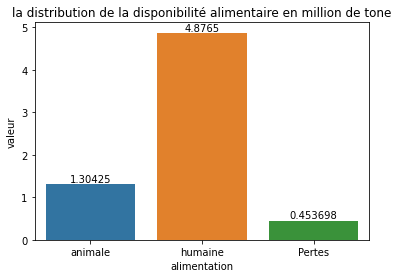

In [43]:
# breakdown sur la disponibilité alimenataire internes 
alimentation_animale=da_p_2017.loc[ da_p_2017['Aliments pour animaux'] > 0  ,'Aliments pour animaux'].sum()
pertes=da_p_2017.loc[ da_p_2017['Pertes'] > 0  ,'Pertes'].sum()
nouriture=da_p_2017.loc[ da_p_2017['Nourriture'] > 0  ,'Nourriture'].sum()
df = pd.DataFrame({'alimentation': ['animale', 'humaine', 'Pertes'], 'valeur': [alimentation_animale, nouriture, pertes]}, columns = ['alimentation', 'valeur'])
ax=sns.barplot(x=df['alimentation'],y=df['valeur']/1000000, data=df)
ax.bar_label(ax.containers[0])
plt.title('la distribution de la disponibilité alimentaire en million de tone')
plt.show()


# partie 2: réponses aux demandes de Mélanie

## analyse fine sur la sous nutrition par pays 

**es pays pour lesquels la proportion de personnes sous-alimentées est la plus forte/faible en 2017**

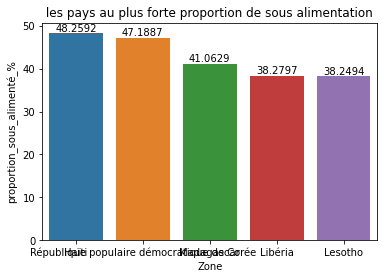

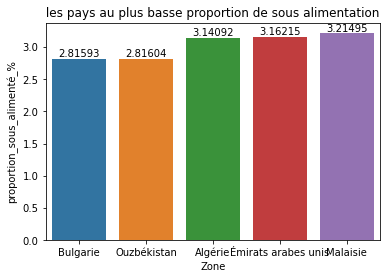

In [44]:
#les pays à forte proportion de personnes sous alimenté en 2017 
#créer une colonne de proportion des personnes sous alimenté par pays en %
sn_p_17['proportion_sous_alimenté_%']=((sn_p_17['Valeur_x']*1000000)/(sn_p_17['Valeur_y']*1000))*100

#renomer les colonnes pour que ca soit plus lisible 
sn_p_17.rename(columns={'Valeur_x':'personnes_sous_alimenté_milion','Valeur_y':'total_population_millier'},inplace=True)
#trier par ordre decroissant sur la proportion de la sous alimentation en %
#print(sn_p_17.sort_values(by='proportion_sous_alimenté_%' , ascending=False)[['Zone','proportion_sous_alimenté_%']])
top5=(sn_p_17.sort_values(by='proportion_sous_alimenté_%' , ascending=False)).head().copy()
bas5=(sn_p_17.sort_values(by='proportion_sous_alimenté_%' , ascending=True)).head().copy()
plt.figure()
plt.title(" les pays au plus forte proportion de sous alimentation ")
ax=sns.barplot(x='Zone',y='proportion_sous_alimenté_%',data=top5)
ax.bar_label(ax.containers[0])
plt.figure()
plt.title(" les pays au plus basse proportion de sous alimentation ")
ax=sns.barplot(x='Zone',y='proportion_sous_alimenté_%',data=bas5)
ax.bar_label(ax.containers[0])
plt.show()


**pays ayant le plus/le moins de disponibilité/habitant 2017**

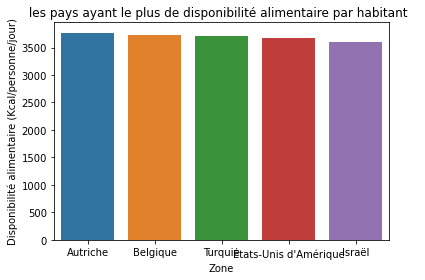

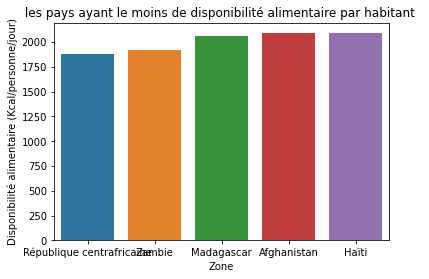

In [47]:
#ceux ayant le plus/le moins de disponibilité alimenaire par habitants
#on utilise la dataframe dispo_alimentaire disponibilité alimentaire, on regroupe par pays puis on trie
#print(dispo_alimentaire.groupby(['Zone'],as_index=False).sum().sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)')[['Disponibilité alimentaire (Kcal/personne/jour)']])
plus5=dispo_alimentaire.groupby(['Zone'],as_index=False).sum().sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending=False).head()
moins5=dispo_alimentaire.groupby(['Zone'],as_index=False).sum().sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)').head()
plt.figure()
plt.title(" les pays ayant le plus de disponibilité alimentaire par habitant   ")
sns.barplot(x='Zone',y='Disponibilité alimentaire (Kcal/personne/jour)',data=plus5)
plt.figure()
plt.title(" les pays ayant le moins de disponibilité alimentaire par habitant  ")
sns.barplot(x='Zone',y='Disponibilité alimentaire (Kcal/personne/jour)',data=moins5)
plt.show()

**pays qui ont le plus bénéficié d’aide depuis 2013**

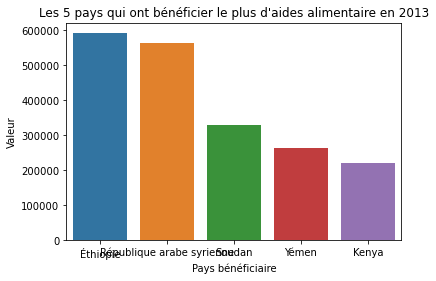

In [48]:
#ceux qui ont beneficier le plus d'aide alimentaire 
aide10=aide_alimentaire.loc[aide_alimentaire['Année']==2013,['Pays bénéficiaire','Valeur']].groupby(['Pays bénéficiaire'],as_index=False).sum().sort_values(by='Valeur',ascending=False).head()
sns.barplot(x='Pays bénéficiaire',y='Valeur',data=aide10)
plt.title("Les 5 pays qui ont bénéficier le plus d'aides alimentaire en 2013")
plt.show()

# Partie 3 : Les analyses proposés par Julien 

**Analyse sur l'utilisation des céréales entre l'alimentation humaine et animale**

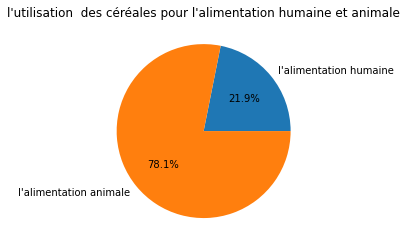

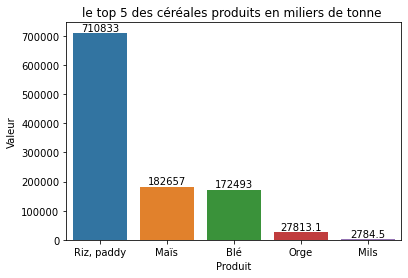

In [50]:
#répartition des céréales entre alimentation humaine et animale 
céréales=dispo_alimentaire.loc[dispo_alimentaire['Produit'].str.contains(pat="Céréales")].copy()
quantité_total_céréales=céréales['Aliments pour animaux'].sum() + céréales['Nourriture'].sum()
utilisation_humaine=(céréales['Nourriture'].sum()/quantité_total_céréales)*100
utilisation_animale=(céréales['Aliments pour animaux'].sum()/quantité_total_céréales)*100
labels=["l'alimentation humaine","l'alimentation animale"]
data=[round(utilisation_humaine,2),round(utilisation_animale,2)]
plt.pie(data,labels=labels,autopct='%1.1f%%')
plt.title("l'utilisation  des céréales pour l'alimentation humaine et animale")
plt.show()
#breakdown sur les céréales 
#print(céréales_2017["Produit"].unique())
céréales_unique=céréales_2017.groupby(by='Produit',as_index=False).sum().sort_values(by='Valeur',ascending=False)[['Produit','Valeur']].head()
plt.title("le top 5 des céréales produits en miliers de tonne ")
ax=sns.barplot(x='Produit',y=céréales_unique['Valeur']/1000000,data=céréales_unique)
ax.bar_label(ax.containers[0])
plt.show()

**l'utilisation du ' manioc en thailande**

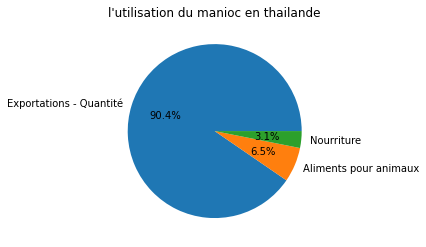

            Zone Produit  Disponibilité alimentaire (Kcal/personne/jour)
13809  Thaïlande  Manioc                                            40.0


In [51]:
manioc=dispo_alimentaire.loc[(dispo_alimentaire['Zone']=='Thaïlande') & (dispo_alimentaire['Produit'] =='Manioc')]
manioc_t=manioc[['Exportations - Quantité','Aliments pour animaux','Nourriture']].T.copy()
plt.pie(x=manioc_t[13809],labels=manioc_t.index,autopct='%1.1f%%')
plt.title("l'utilisation du manioc en thailande")
plt.show()
print(manioc[['Zone','Produit',"Disponibilité alimentaire (Kcal/personne/jour)"]])